___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [365]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew, kurtosis

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
pd.set_option('display.float_format', lambda x: f'{x:.6f}')
# pd.set_option('display.float_format', lambda x: '%.6f'%x)
# pd.options.display.float_format = '{:.3f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [366]:
# !pip install cufflinks
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline

In [367]:
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

In [368]:
# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

In [369]:
params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'c',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

In [370]:
df_origin = pd.read_excel('./Raisin_Dataset.xlsx')
df = df_origin
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040000,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786000,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575000,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162000,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251000,Kecimen


In [371]:
df.shape

(900, 8)

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [373]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000000,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.000000,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.000000,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.000000,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.000000,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.000000,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.000000,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [374]:
df.describe(include='O').T

,count,unique,top,freq
Class,900,2,Kecimen,450


## Exploratory Data Analysis and Visualization

### Check Target Feature

In [383]:
df["Class"].value_counts(normalize=True).to_frame(name='percentage').reset_index()

,index,percentage
0,Kecimen,0.500000
1,Besni,0.500000


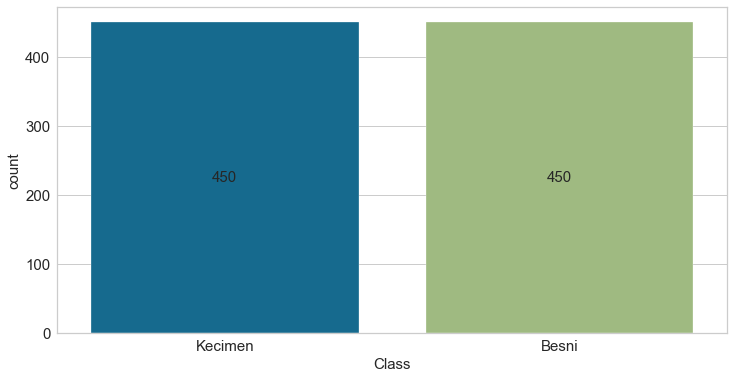

In [384]:
# to show the proportion of each class
g = sns.countplot(df["Class"])
g.bar_label(g.containers[0], label_type='center');

- We have prety same amout of classes in the data set. So I can use accuracy as a metric to evaluate the performance of the classifier.

<AxesSubplot:title={'center':'Percentage of Class'}>

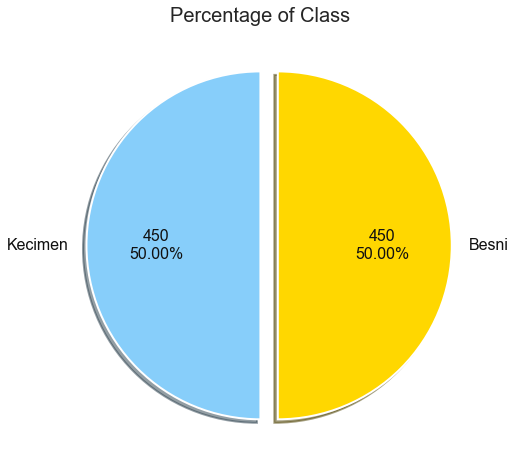

In [385]:
df["Class"].value_counts(normalize=True).plot.pie(
#     subplots=True, layout=(1,2),
#     legend=False,
    explode=[0, 0.1],
    shadow=True,
    colors=["LightSkyBlue",  "gold"],
    textprops={'fontsize':16, 'color':'k'},
    wedgeprops = {'linewidth':2, 'edgecolor':'white'},
    autopct=lambda x: f'{(x/100*len(df["Class"])):.0f}\n{x:.2f}%', # "%.1f%%"
    figsize=(10,8),
    startangle=90,
    title="Percentage of Class",
    ylabel= "",
#     labels=['high', 'low'],
)

In [386]:
df_origin['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [387]:
df_origin['Class'].astype('category').cat.codes.value_counts()

1    450
0    450
dtype: int64

In [388]:
df_origin[['Class']].apply(lambda x: pd.factorize(x, sort=True)[0]).value_counts()

Class
0        450
1        450
dtype: int64

In [389]:
# mapping the classes to 0 and 1
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1}) 

### Graphical analysis

In [390]:
df.iloc[:,:-1].iplot(kind="box")

In [391]:
fig = px.box(df, color="Class", color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
fig.show()

In [392]:
df.iplot(kind="bar")

In [393]:
fig = px.bar(df,x=df.index,y="Area",color="Class",color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
fig.show()

<AxesSubplot:>

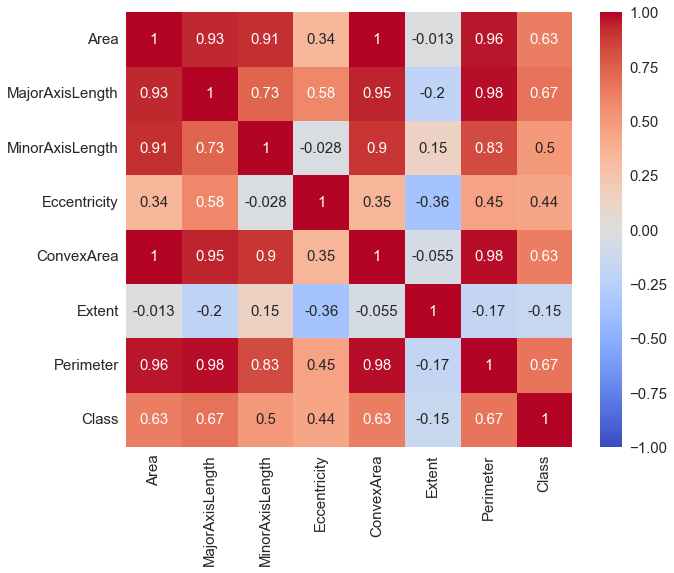

In [394]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(),vmin=-1,vmax=1, annot=True, cmap='coolwarm')

In [401]:
corr_matrix = df.corr()
fig = px.imshow(corr_matrix, text_auto=True)
fig.show()

In [402]:
df_numeric = df.select_dtypes("number")
df_numeric.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352,0.625715
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978,0.673194
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417,0.503102
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845,0.438500
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612,0.625567
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449,-0.154689
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000,0.665981
Class,0.625715,0.673194,0.503102,0.438500,0.625567,-0.154689,0.665981,1.000000


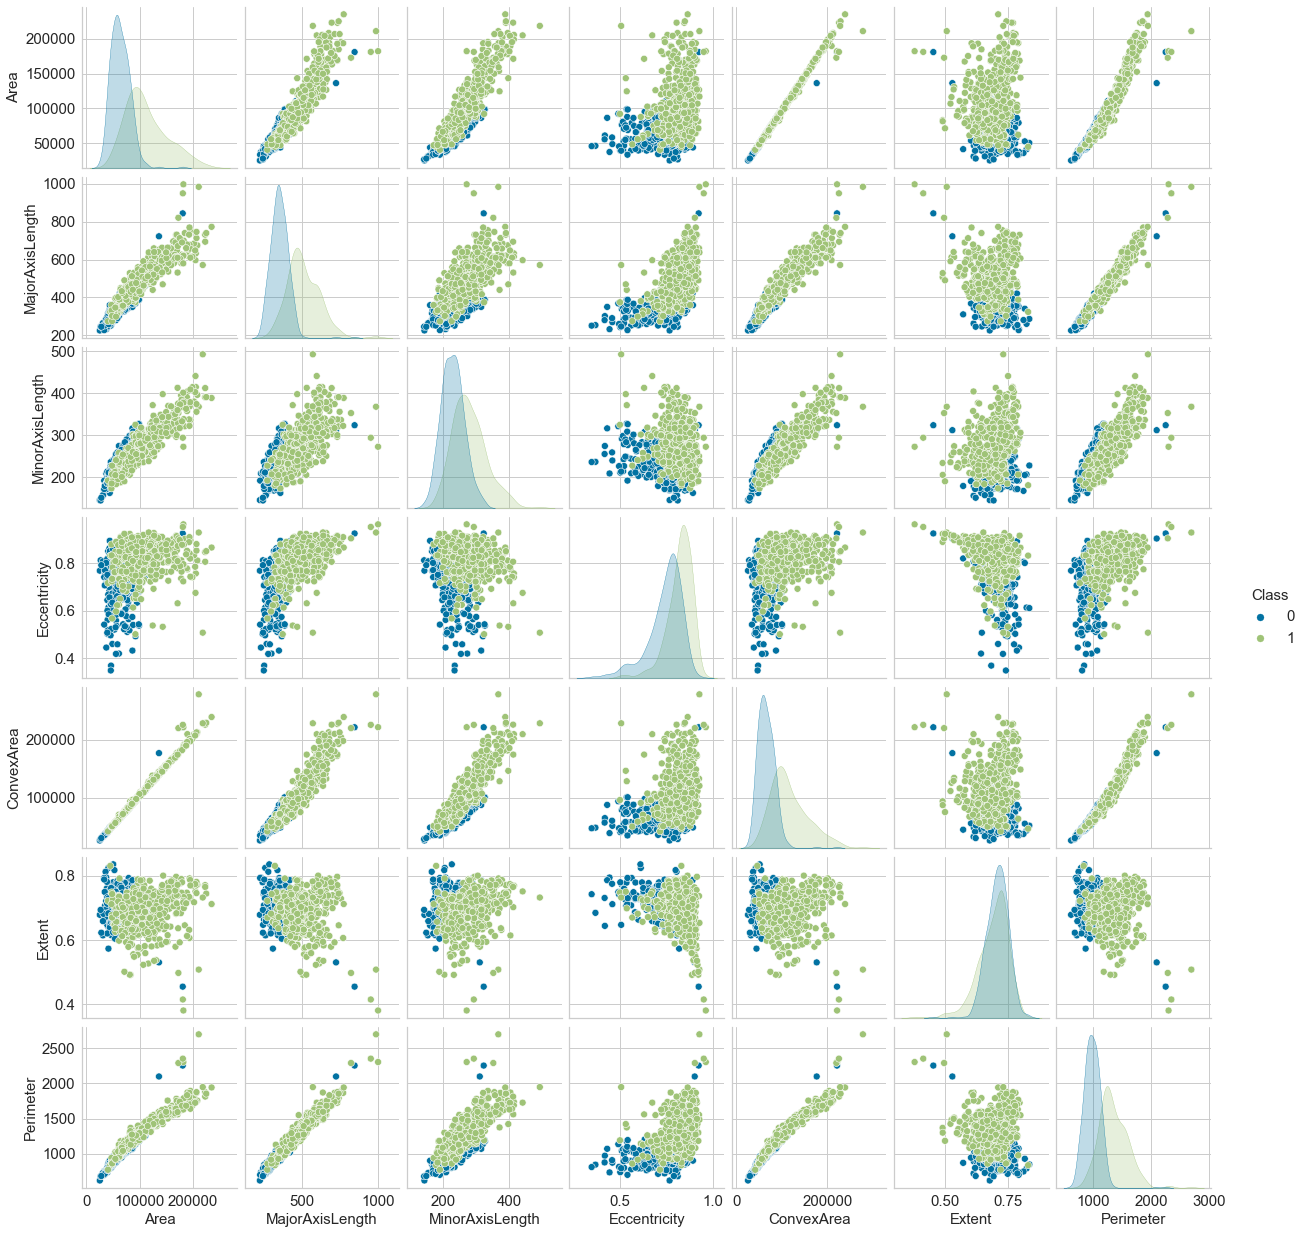

In [403]:
sns.pairplot(df, hue = "Class")

## Train | Test Split and Scaling

* for train_test_split use fallowing arguments:
    * train_size: 0.2
    * stratify: True
    * random_state: 10    
* Use StandardScaler to scale the data.

In [468]:
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [470]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,720.000000,87368.715278,38658.103130,25387.000000,59230.500000,79079.000000,102887.000000,235047.000000
MajorAxisLength,720.000000,428.808525,113.515166,225.629541,345.833266,408.387738,488.283467,997.291941
MinorAxisLength,720.000000,254.426958,49.776166,144.618672,220.010095,247.848409,277.886641,492.275279
Eccentricity,720.000000,0.780017,0.090102,0.369212,0.740354,0.797257,0.841791,0.962124
ConvexArea,720.000000,90612.783333,40213.877994,26139.000000,61488.000000,81987.500000,107013.000000,278217.000000
Extent,720.000000,0.701102,0.050424,0.379856,0.673229,0.708556,0.734088,0.835455
Perimeter,720.000000,1160.797085,267.407318,619.074000,966.410750,1120.398000,1293.986750,2697.753000


In [471]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,180.000000,89545.777778,40412.383343,26908.000000,59570.250000,77267.500000,111878.500000,222915.000000
MajorAxisLength,180.000000,439.415653,125.588121,245.755781,338.180381,403.392635,522.402789,949.662672
MinorAxisLength,180.000000,254.732831,50.970829,143.710872,214.509772,247.789408,290.078396,403.719328
Eccentricity,180.000000,0.787642,0.091175,0.348730,0.748212,0.806780,0.846095,0.951082
ConvexArea,180.000000,93479.316667,42959.054114,28607.000000,61663.000000,80577.000000,114074.750000,227170.000000
Extent,180.000000,0.693131,0.063983,0.414154,0.656769,0.700974,0.737870,0.792772
Perimeter,180.000000,1186.344839,297.756773,678.815000,963.243750,1107.741000,1381.413500,2352.029000


In [472]:
y_train.value_counts()

0    360
1    360
Name: Class, dtype: int64

In [473]:
y_test.value_counts()

0    90
1    90
Name: Class, dtype: int64

# Logistic Regression

* Train the model using the training set with the default parameters.

In [474]:
# will be used in the pipelines
scaler = StandardScaler() 
log_model = LogisticRegression() 

In [475]:
# pipeline for logistic regression
log_pipe = Pipeline([
    ("scaler",scaler),
    ("log_model",log_model)
]) 

In [476]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [477]:
y_pred = log_pipe.predict(X_test)
y_pred_train = log_pipe.predict(X_train)

## Model Performance
*Check the accuracy of the model using the train and test set by given eval_metric function.

In [478]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    """ Use print - to get the metrics for the model """
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    return f'''Test_Set
{confusion_matrix(y_test, y_pred)}
{classification_report(y_test, y_pred)}

Train_Set
{confusion_matrix(y_train, y_train_pred)}
{classification_report(y_train, y_train_pred)}'''

In [479]:
# to get the metrics for the model
ls = eval_metric(log_pipe, X_train, y_train, X_test, y_test)
print(ls)

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



In [480]:
pd.DataFrame(y_pred_train, columns=['y_pred_train'])

,y_pred_train
0,0
1,0
2,1
3,1
4,0
...,...
715,1
716,1
717,1
718,1


In [481]:
accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_train)

(0.8722222222222222, 0.8666666666666667)

In [482]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [483]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



In [484]:
print(confusion_matrix(y_test, y_pred))

[[81  9]
 [14 76]]


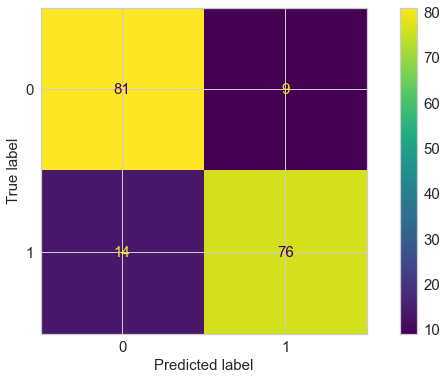

In [485]:
plot_confusion_matrix(log_pipe, X_test, y_test);

In [486]:
y_pred_proba = log_pipe.predict_proba(X_test)

In [487]:
log_pipe.predict_proba(X_test)[:,1]

array([0.09076677, 0.7860764 , 0.13863394, 0.02499339, 0.28157126,
       0.0219098 , 0.03284627, 0.73021573, 0.37758648, 0.17183422,
       0.44991258, 0.35187587, 0.99866363, 0.99265327, 0.99977781,
       0.99593975, 0.99989644, 0.79432043, 0.11962133, 0.27269099,
       0.04593401, 0.99939936, 0.25161889, 0.01322968, 0.71858213,
       0.69294715, 0.87100972, 0.76872259, 0.10341013, 0.17344259,
       0.99902064, 0.23726244, 0.13977305, 0.98915468, 0.99942373,
       0.10287839, 0.05305718, 0.01873485, 0.21048317, 0.94439151,
       0.49100265, 0.77141011, 0.71683251, 0.01815421, 0.05229298,
       0.1786905 , 0.02436739, 0.35540984, 0.13322244, 0.32348303,
       0.0332106 , 0.4472902 , 0.01669556, 0.82715252, 1.        ,
       0.30557451, 0.67329845, 0.87777174, 0.04710847, 0.98017057,
       0.87848463, 0.15145024, 0.99714058, 0.99596047, 0.19951867,
       0.38041328, 0.26395089, 0.86138287, 0.67096499, 0.50948638,
       0.45227727, 0.12071065, 0.98924453, 0.96153191, 0.03190

### Cross Validate

* Use the cross_val_score function to evaluate the model using the train set.

In [488]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [489]:
from sklearn.model_selection import cross_validate

In [490]:
# pipeline for logistic regression
pipe_model = Pipeline([
    ("scaler",scaler),
    ("log_model",log_model)
]) 

scores = cross_validate(
    pipe_model, X_train, y_train, 
    scoring = ['accuracy', 'precision','recall','f1'], 
    cv = 10,
    error_score="raise"
)

df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.011034,0.003997,0.875000,0.935484,0.805556,0.865672
1,0.009006,0.003995,0.847222,0.857143,0.833333,0.845070
2,0.009001,0.004969,0.861111,0.842105,0.888889,0.864865
3,0.009275,0.002965,0.819444,0.767442,0.916667,0.835443
4,0.010027,0.002998,0.861111,0.933333,0.777778,0.848485
5,0.009004,0.003001,0.847222,0.903226,0.777778,0.835821
6,0.008997,0.003001,0.930556,0.942857,0.916667,0.929577
7,0.007996,0.004129,0.847222,0.804878,0.916667,0.857143
8,0.000000,0.000000,0.847222,0.857143,0.833333,0.845070
9,0.015660,0.000000,0.902778,0.967742,0.833333,0.895522


In [491]:
df_scores.mean()[2:]

test_accuracy    0.863889
test_precision   0.881135
test_recall      0.850000
test_f1          0.862267
dtype: float64

In [492]:
print(ls)

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### GridSearchCV
* Use the GridSearchCV function to find the best parameters for the model.

In [493]:
from sklearn.model_selection import GridSearchCV

In [494]:
scaler = StandardScaler() 
log_model = LogisticRegression() 

In [495]:
# pipeline for logistic regression
pipe_model = Pipeline([
    ("scaler",scaler),
    ("log_model",log_model)
]) 

In [496]:
# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"] 

In [497]:
# to get 20 values of C between -1 and 5
C = np.logspace(-1, 5, 20)

In [498]:
# balanced: class weights are balanced, None: no class weights
class_weight= ["balanced", None] 

In [499]:
# to get 4 values of solver
solver = ["lbfgs", "liblinear", "sag", "saga"]

In [500]:
# to get all the combinations of penalty, C, class_weight and solver
param_grid = {"log_model__penalty" : penalty,
              "log_model__C" : [C,1],
              "log_model__class_weight":class_weight,
              "log_model__solver":solver} 

In [501]:
# to get the best model
grid_model = GridSearchCV(
    estimator=pipe_model,
    param_grid=param_grid,
    cv=5,
    scoring = 'accuracy',       
    n_jobs = -1
) 

In [502]:
grid_model.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'log_model', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'log_model__C', 'log_model__class_weight', 'log_model__dual', 'log_model__fit_intercept', 'log_model__intercept_scaling', 'log_model__l1_ratio', 'log_model__max_iter', 'log_model__multi_class', 'log_model__n_jobs', 'log_model__penalty', 'log_model__random_state', 'log_model__solver', 'log_model__tol', 'log_model__verbose', 'log_model__warm_start'])

In [503]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [504]:
grid_model.best_params_

{'log_model__C': 1,
 'log_model__class_weight': 'balanced',
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [505]:
grid_model.best_score_

0.8652777777777778

In [506]:
print(ls)

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



In [508]:
print(eval_metric(grid_model, X_train, y_train, X_test, y_test))  

Test_Set
[[79 11]
 [10 80]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        90
           1       0.88      0.89      0.88        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[316  44]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.87      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

* Use the roc_curve function to calculate the ROC curve and compare logistic regression models with default and tuned parameters. 

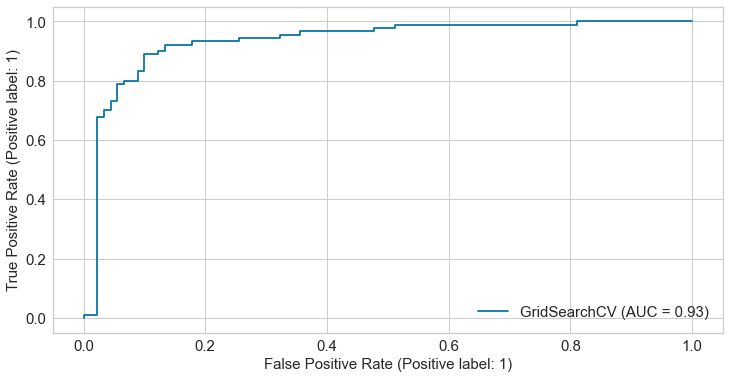

In [509]:
# we use ROC curve to get the AUC score and evaluate the model if it is good or not on every threshold
plot_roc_curve(grid_model, X_test, y_test) 

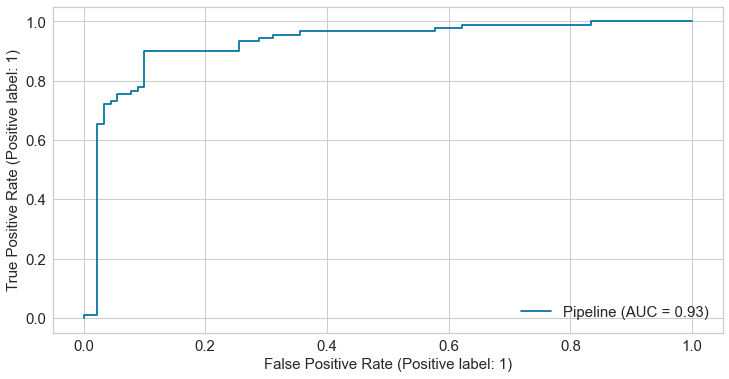

In [510]:
plot_roc_curve(log_pipe, X_test, y_test) 

## KNN (K-Nearest Neighbors)
* Train the model using the training set with the default parameters.

### Elbow Method for Choosing Reasonable K Values
* Use the elbow method to find the optimal number of neighbors.

### Scores by Various K Values
* Select some k values smaller and bigger than the optimal k value to see how the model performs.

### Cross Validate
* Use the cross_val_score function to evaluate the model using the train set. Use optimal k value which you found in the elbow method.


### Gridsearch Method for Choosing Reasonable K Values
* Use the GridSearchCV function to find the best parameters for the model. this method is brute force method to find the best parameters, and it takes a long time to run for KNN. You will get different k values because of you will use different parameters, and also gridsearch method tries to find minimum error. Sometimes it get larger k values for optimal but for  sake of reduce complexity we use the elbow method to find the optimal k value.

### Evaluating ROC Curves and AUC
*Use the roc_curve function to calculate the ROC curve and compare KNN models with default and tuned parameters.

# Conclusion 
* Write a short summary of your findings, and decide which model you will use and why.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___